In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
import math
from sklearn import metrics
import pickle
import seaborn as sb

In [ ]:
sub1 = pd.read_excel('/content/drive/MyDrive/data/Điểm tổng kết của sinh viên.xlsx')

In [ ]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STT                             100 non-null    int64  
 1   Nhập môn lập trình              100 non-null    float64
 2   Lập trình hướng đối tượng       100 non-null    float64
 3   Cấu trúc dữ liệu và giải thuật  100 non-null    object 
 4   Lập trình Web                   100 non-null    object 
 5   Kiến trúc máy tính              100 non-null    object 
 6   Hệ điều hành                    100 non-null    object 
 7   Mạng máy tính                   100 non-null    float64
 8   Thực hành mạng máy tính         100 non-null    float64
 9   Cơ sở dữ liệu                   100 non-null    object 
 10  Thực hành cơ sở dữ liệu         100 non-null    object 
 11  Hệ quản trị CSDL                100 non-null    object 
 12  Trí tuệ nhân tạo                100 n

Chuyên nghành:
1. Công nghệ phần mềm
2. Hệ thống thông tin
3. Mạng máy tính và truyền thông
4. Khoa học phân tích dữ liệu

In [ ]:
sub1.head(20)

,STT,Nhập môn lập trình,Lập trình hướng đối tượng,Cấu trúc dữ liệu và giải thuật,Lập trình Web,Kiến trúc máy tính,Hệ điều hành,Mạng máy tính,Thực hành mạng máy tính,Cơ sở dữ liệu,Thực hành cơ sở dữ liệu,Hệ quản trị CSDL,Trí tuệ nhân tạo,Toán rời rạc,Công nghệ Java,Chuyên ngành
0,1,7.0,5.0,7.5,5.5,6,6,6.5,7.5,3.9,7.5,7,7.9,2.9,7.3,3
1,2,6.3,8.8,8.8,7.3,6.8,7,8.4,6.3,7.9,9.4,8.1,7.6,5,9.1,1
2,3,7.0,7.5,7.5,7,6,6.5,8.9,7.0,6,8,6,8.8,5.5,7.4,1
3,4,7.5,8.5,8,9,7,7,8.5,9.0,8,8,8.3,7.7,8,8.7,4
4,5,6.3,8.0,5.4,7,4.3,6.1,8.0,5.9,7.8,5.5,6.5,5,8.5,7.8,4
5,6,8.9,10.0,9.9,8.7,7.1,8,9.8,7.5,9.7,9.5,8.1,8,8.6,8.4,4
6,7,9.5,8.5,7.5,8.5,9.5,10,8.0,7.8,8.8,10,8.8,8.5,9.8,7.0,4
7,8,8.2,8.4,8.2,7.9,5.6,7,6.6,6.8,7.4,8.5,6.8,6.6,6.5,4.6,2
8,9,8.0,7.0,7,9,6,7,7.0,8.0,6,7,8,8,4,8.0,1
9,10,4.2,7.2,4.9,8.4,4.5,4.2,8.2,8.0,6.3,7.2,8.1,6.9,6.7,7.1,4


In [ ]:
sub1 = sub1.drop(columns='Kiến trúc máy tính')


In [ ]:
sub1 = sub1.drop(columns='STT')

In [ ]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nhập môn lập trình              100 non-null    float64
 1   Lập trình hướng đối tượng       100 non-null    float64
 2   Cấu trúc dữ liệu và giải thuật  100 non-null    object 
 3   Lập trình Web                   100 non-null    object 
 4   Hệ điều hành                    100 non-null    object 
 5   Mạng máy tính                   100 non-null    float64
 6   Thực hành mạng máy tính         100 non-null    float64
 7   Cơ sở dữ liệu                   100 non-null    object 
 8   Thực hành cơ sở dữ liệu         100 non-null    object 
 9   Hệ quản trị CSDL                100 non-null    object 
 10  Trí tuệ nhân tạo                100 non-null    object 
 11  Toán rời rạc                    100 non-null    object 
 12  Công nghệ Java                  100 n

In [ ]:
sub1.head(20)

,Nhập môn lập trình,Lập trình hướng đối tượng,Cấu trúc dữ liệu và giải thuật,Lập trình Web,Hệ điều hành,Mạng máy tính,Thực hành mạng máy tính,Cơ sở dữ liệu,Thực hành cơ sở dữ liệu,Hệ quản trị CSDL,Trí tuệ nhân tạo,Toán rời rạc,Công nghệ Java,Chuyên ngành
0,7.0,5.0,7.5,5.5,6,6.5,7.5,3.9,7.5,7,7.9,2.9,7.3,3
1,6.3,8.8,8.8,7.3,7,8.4,6.3,7.9,9.4,8.1,7.6,5,9.1,1
2,7.0,7.5,7.5,7,6.5,8.9,7.0,6,8,6,8.8,5.5,7.4,1
3,7.5,8.5,8,9,7,8.5,9.0,8,8,8.3,7.7,8,8.7,4
4,6.3,8.0,5.4,7,6.1,8.0,5.9,7.8,5.5,6.5,5,8.5,7.8,4
5,8.9,10.0,9.9,8.7,8,9.8,7.5,9.7,9.5,8.1,8,8.6,8.4,4
6,9.5,8.5,7.5,8.5,10,8.0,7.8,8.8,10,8.8,8.5,9.8,7.0,4
7,8.2,8.4,8.2,7.9,7,6.6,6.8,7.4,8.5,6.8,6.6,6.5,4.6,2
8,8.0,7.0,7,9,7,7.0,8.0,6,7,8,8,4,8.0,1
9,4.2,7.2,4.9,8.4,4.2,8.2,8.0,6.3,7.2,8.1,6.9,6.7,7.1,4


In [ ]:
sub1 = sub1.replace(to_replace='chưa học', value=np.nan)
sub1 = sub1.replace(to_replace='Chưa học', value=np.nan)
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nhập môn lập trình              100 non-null    float64
 1   Lập trình hướng đối tượng       100 non-null    float64
 2   Cấu trúc dữ liệu và giải thuật  97 non-null     object 
 3   Lập trình Web                   99 non-null     object 
 4   Hệ điều hành                    98 non-null     object 
 5   Mạng máy tính                   100 non-null    float64
 6   Thực hành mạng máy tính         100 non-null    float64
 7   Cơ sở dữ liệu                   99 non-null     object 
 8   Thực hành cơ sở dữ liệu         99 non-null     object 
 9   Hệ quản trị CSDL                98 non-null     object 
 10  Trí tuệ nhân tạo                98 non-null     object 
 11  Toán rời rạc                    99 non-null     object 
 12  Công nghệ Java                  100 n

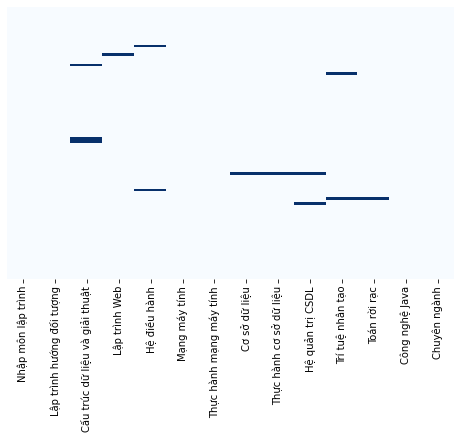

In [ ]:
fig, ax = plt.subplots(figsize = (8,5))
sb.heatmap(sub1.isna(), cmap="Blues", cbar=False, yticklabels=False)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
impute = SimpleImputer(missing_values= np.nan, strategy="mean")

impute.fit(sub1[['Cấu trúc dữ liệu và giải thuật', 'Lập trình Web', 'Hệ điều hành', 'Cơ sở dữ liệu', 'Thực hành cơ sở dữ liệu', 'Hệ quản trị CSDL', 'Trí tuệ nhân tạo', 'Toán rời rạc']])
sub1[['Cấu trúc dữ liệu và giải thuật', 'Lập trình Web', 'Hệ điều hành', 'Cơ sở dữ liệu', 'Thực hành cơ sở dữ liệu', 'Hệ quản trị CSDL', 'Trí tuệ nhân tạo', 'Toán rời rạc']] = impute.transform(sub1[['Cấu trúc dữ liệu và giải thuật', 'Lập trình Web', 'Hệ điều hành', 'Cơ sở dữ liệu', 'Thực hành cơ sở dữ liệu', 'Hệ quản trị CSDL', 'Trí tuệ nhân tạo', 'Toán rời rạc']])

In [ ]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nhập môn lập trình              100 non-null    float64
 1   Lập trình hướng đối tượng       100 non-null    float64
 2   Cấu trúc dữ liệu và giải thuật  100 non-null    float64
 3   Lập trình Web                   100 non-null    float64
 4   Hệ điều hành                    100 non-null    float64
 5   Mạng máy tính                   100 non-null    float64
 6   Thực hành mạng máy tính         100 non-null    float64
 7   Cơ sở dữ liệu                   100 non-null    float64
 8   Thực hành cơ sở dữ liệu         100 non-null    float64
 9   Hệ quản trị CSDL                100 non-null    float64
 10  Trí tuệ nhân tạo                100 non-null    float64
 11  Toán rời rạc                    100 non-null    float64
 12  Công nghệ Java                  100 n

In [ ]:
sub1.head(20)

,Nhập môn lập trình,Lập trình hướng đối tượng,Cấu trúc dữ liệu và giải thuật,Lập trình Web,Hệ điều hành,Mạng máy tính,Thực hành mạng máy tính,Cơ sở dữ liệu,Thực hành cơ sở dữ liệu,Hệ quản trị CSDL,Trí tuệ nhân tạo,Toán rời rạc,Công nghệ Java,Chuyên ngành
0,7.0,5.0,7.5,5.500000,6.000000,6.5,7.5,3.9,7.5,7.0,7.9,2.9,7.3,3
1,6.3,8.8,8.8,7.300000,7.000000,8.4,6.3,7.9,9.4,8.1,7.6,5.0,9.1,1
2,7.0,7.5,7.5,7.000000,6.500000,8.9,7.0,6.0,8.0,6.0,8.8,5.5,7.4,1
3,7.5,8.5,8.0,9.000000,7.000000,8.5,9.0,8.0,8.0,8.3,7.7,8.0,8.7,4
4,6.3,8.0,5.4,7.000000,6.100000,8.0,5.9,7.8,5.5,6.5,5.0,8.5,7.8,4
5,8.9,10.0,9.9,8.700000,8.000000,9.8,7.5,9.7,9.5,8.1,8.0,8.6,8.4,4
6,9.5,8.5,7.5,8.500000,10.000000,8.0,7.8,8.8,10.0,8.8,8.5,9.8,7.0,4
7,8.2,8.4,8.2,7.900000,7.000000,6.6,6.8,7.4,8.5,6.8,6.6,6.5,4.6,2
8,8.0,7.0,7.0,9.000000,7.000000,7.0,8.0,6.0,7.0,8.0,8.0,4.0,8.0,1
9,4.2,7.2,4.9,8.400000,4.200000,8.2,8.0,6.3,7.2,8.1,6.9,6.7,7.1,4


In [ ]:
sub1.to_csv('/content/drive/MyDrive/data/TongHopDiemSinhVien_clean1', index=False)

###**Training model with KNN algorithm**

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/TongHopDiemSinhVien_clean1')

In [ ]:
data.head()

,Nhập môn lập trình,Lập trình hướng đối tượng,Cấu trúc dữ liệu và giải thuật,Lập trình Web,Hệ điều hành,Mạng máy tính,Thực hành mạng máy tính,Cơ sở dữ liệu,Thực hành cơ sở dữ liệu,Hệ quản trị CSDL,Trí tuệ nhân tạo,Toán rời rạc,Công nghệ Java,Chuyên ngành
0,7.0,5.0,7.5,5.5,6.0,6.5,7.5,3.9,7.5,7.0,7.9,2.9,7.3,3
1,6.3,8.8,8.8,7.3,7.0,8.4,6.3,7.9,9.4,8.1,7.6,5.0,9.1,1
2,7.0,7.5,7.5,7.0,6.5,8.9,7.0,6.0,8.0,6.0,8.8,5.5,7.4,1
3,7.5,8.5,8.0,9.0,7.0,8.5,9.0,8.0,8.0,8.3,7.7,8.0,8.7,4
4,6.3,8.0,5.4,7.0,6.1,8.0,5.9,7.8,5.5,6.5,5.0,8.5,7.8,4


Chia tập dữ liệu

In [ ]:
X = data.drop('Chuyên ngành', axis=1)
y = data.iloc[:,-1]
print ('Số lượng class: %d' %len(np.unique(y)))
print ('Số lượng thuộc tính: %d' %len(y))

Số lượng class: 4
Số lượng thuộc tính: 100


In [ ]:
#Chia tập dữ liệu ra thành train set và test set
def chiaTapDL(rd):
    global X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=rd)

def trainModel(k):
    global clf
    clf = neighbors.KNeighborsClassifier(n_neighbors = k, p = 1)
    clf.fit(X_train, y_train)

def saveModel(model):
    with open('model_pickle', 'wb') as f:
        pickle.dump(model, f)

def findBestRandom_state(tyLeKyVong):
    m=0
    metr = []
    max = 0
    while max != tyLeKyVong:
        m=m+1
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=m)
        metr.clear()
        max = 0
        for k in range(1,30):    
            clf = neighbors.KNeighborsClassifier(n_neighbors = k, p = 1)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            score = metrics.accuracy_score(y_test, y_pred)
            metr.append(score)
        max = np.max(metr)
    return m
    
#Hàm tìm n_neighbors tốt nhất
def findBestN_neighbors():
    for k in range(1,30):    
        clf = neighbors.KNeighborsClassifier(n_neighbors = k, p = 1)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        score = metrics.accuracy_score(y_test, y_pred)
        plt.scatter(score, k, c='red')
    plt.show()

In [ ]:
#Tìm kiếm tham số Random_state tốt nhất với mong muốn tỷ lệ train đúng là 85%
rd_state = findBestRandom_state(0.85)
print(f"random_state = {rd_state}")

random_state = 346


In [ ]:
#Chia tập dữ liêu với Random_state tìm được ở trên
chiaTapDL(rd_state)

print(f"Số lượng của tập train: {len(X_train.values)}")
print(f"Số lượng của tập test: {len(X_test.values)}")

Số lượng của tập train: 80
Số lượng của tập test: 20


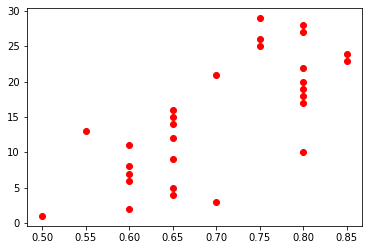

In [ ]:
#Tìm tham số n_neighbors cho ra tỷ lệ train tốt nhất
findBestN_neighbors()

Từ biểu đồ thấy với tỷ lệ đúng là 0.85 thì giá trị n_neighbors nằm trong khoảng 22-24

In [ ]:
#Lấy giá trị n_neighbors là 23 để train mô hình
trainModel(23)

In [ ]:
#Kiểm thử mô hình bằng tập test
y_pred = clf.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.85

In [ ]:
#Lưu lại mô hình
saveModel(clf)